In [1]:
#Load libraries and import Employee Compensation df
import pandas as pd
import numpy as np
import sqlite3
import pandas_profiling
import rpy2
import rpy2.rinterface
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
#import rpy2.ipython

In [2]:
dfm = pd.read_csv('/Users/mtran/Documents/SMUDataSciences/2019-Summer/EmpComp_Cleaned.csv')
print("Finished Loading CLEANED Data.")

Finished Loading CLEANED Data.


In [55]:
dfm.shape

(333594, 22)

In [54]:
dfm.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,333594.000000,333594.000000,333594.000000,3.335940e+05,333594.000000,333594.000000,333594.00000,333594.000000,333594.000000,333594.000000,333594.000000,333594.000000,333594.000000
mean,2016.278533,3.326253,489.143159,3.135046e+06,58551.935150,4465.978568,3184.66733,66202.581048,11465.227851,8199.214953,4364.253009,24028.695813,90231.276861
std,1.971718,1.890964,332.360692,4.112551e+06,46890.418363,11514.751974,6864.34306,54437.160996,9816.015221,5577.656978,4061.664248,17784.555424,71108.386635
min,2013.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,2.000000,236.000000,2.232800e+04,12491.620000,0.000000,0.00000,13834.705000,347.620000,1663.670000,906.397500,4248.077500,18735.662500
50%,2017.000000,3.000000,535.000000,4.485350e+04,58749.380000,0.000000,455.70000,63487.825000,11776.875000,11258.665000,3812.365000,28709.615000,92064.485000
75%,2018.000000,5.000000,790.000000,8.526791e+06,89696.372500,2632.737500,3421.11250,100250.495000,18141.842500,12801.790000,6712.492500,37510.747500,137930.022500
max,2019.000000,7.000000,990.000000,1.071014e+07,631952.710000,309897.200000,336726.34000,637457.580000,118296.720000,22270.120000,37198.600000,141920.270000,779377.850000


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(dfm)

Number of variables,22
Number of observations,333594
Total Missing (%),0.5%
Total size in memory,56.0 MiB
Average record size in memory,176.0 B
Numeric,9
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,5


The data shows that each unique employee identifier is a member of other hierarchical category attributes. An employee is assigned to one or more job(s) that is grouped among 58 job families. The employee can be a member of one or more Unions, Departments, and Organization Groups, although the majority belong only to one Union, Department, and Organization Group.

Reviewing the above Warnings from simple statistics, we rejected the highly correlated attributes. However, to prove our hypothesis, we kept the Total Salary and related attributes and found using the seven (7) Organization Groups provided better vizualizations and information about the 333,594 rows than did the other category attributes.

A quick count of records by Organization Group yielded that Public Works, Transportation & Commerce has the highest number of data points that we can assume to be employees as compared to the lowest number of Human Welfare & Neighborhood Development personnel.

Public Works, Transportation & Commerce     96231
Community Health                            65625
Public Protection                           58744
General City Responsibilities               29203
Culture & Recreation                        28041
General Administration & Finance            28012
Human Welfare & Neighborhood Development    27738
Name: Organization Group, dtype: int64


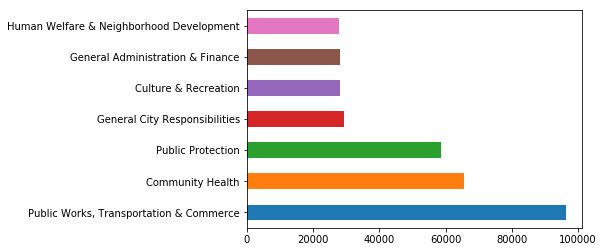

In [4]:
#View number of records by Organization Group
dfm1 = dfm["Organization Group"].value_counts()
dfm1.plot(kind = 'barh')
print (dfm1)

While the Total Salary of all the Organization Group shows as right-skewed in its distriution, each group reflects two peaks suggesting further exploration into its elements.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


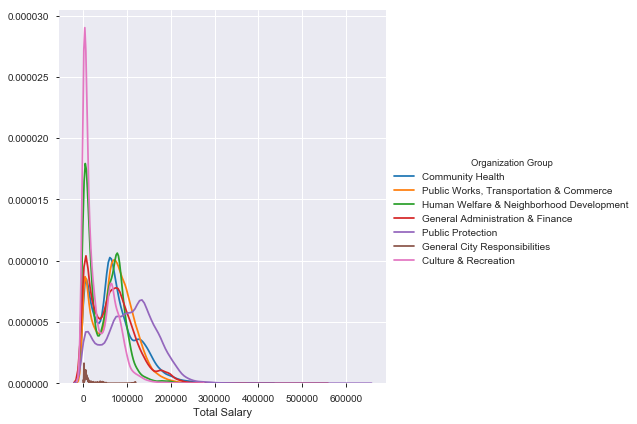

In [44]:
#Distribution of the Total Salary by Organization Group 
sns.FacetGrid(df_clean, hue="Organization Group", size=6) \
.map(sns.kdeplot, "Total Salary") \
.add_legend()

The boxplots of the Total Salary by Organization Groups shows that Public Protection employees have the highest Total Salary whereas General City Responsibilities employees have the least amount in Total Salary.

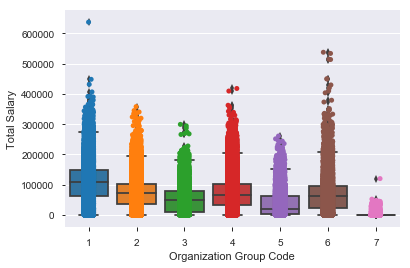

In [45]:
#Boxplot Total Salary by Organization Group
ax = sns.boxplot(x="Organization Group Code", y="Total Salary", data=df_clean)
ax = sns.stripplot(x="Organization Group Code", y="Total Salary", data=df_clean, jitter=True, edgecolor="gray")

The next three boxplots break out Total Salary into its separate elements of Salaries, Overtime, and Other Salaries by Organization Group confirm the same distributions as Total Salary.

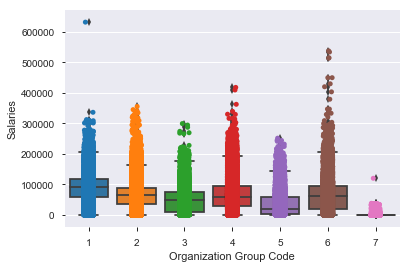

In [49]:
# Boxplot Salaries by Organization Group
ax = sns.boxplot(x="Organization Group Code", y="Salaries", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Salaries", data=dfm, jitter=True, edgecolor="gray")

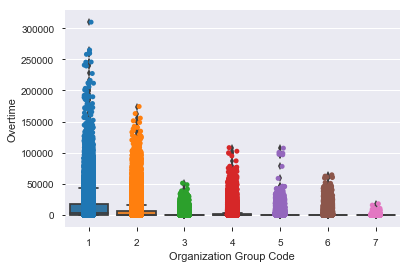

In [50]:
# Boxplot Overtime by Organization Group
ax = sns.boxplot(x="Organization Group Code", y="Overtime", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Overtime", data=dfm, jitter=True, edgecolor="gray")

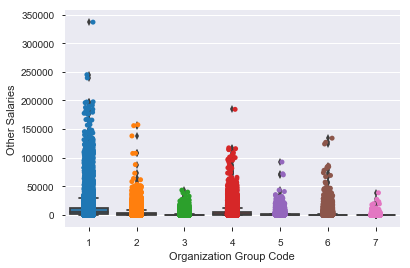

In [52]:
# Boxplot Overtime by Organization Group
ax = sns.boxplot(x="Organization Group Code", y="Other Salaries", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Other Salaries", data=dfm, jitter=True, edgecolor="gray")

Interestingly, the below plot of Overtime and Salaries suggest a normal distribution that neither lowest nor highest salary earners participate in overtime.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


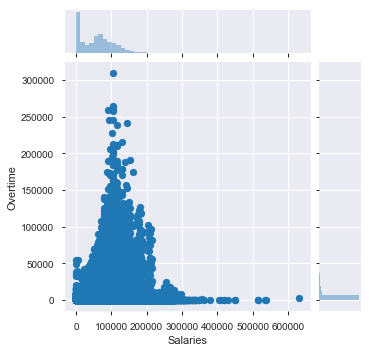

In [53]:
sns.jointplot(x="Salaries", y="Overtime", data=dfm, size=5)

On the other hand, personnel with lower Salaries are paid more Other Salaries as compared to the those who have mid to higher salaries.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


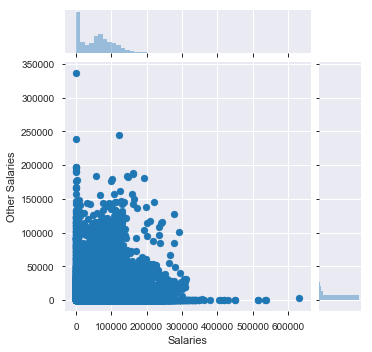

In [56]:
sns.jointplot(x="Salaries", y="Other Salaries", data=dfm, size=5)

As expected, we see a positive correlation between Retirement and Total Salary in the scatter plot below.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


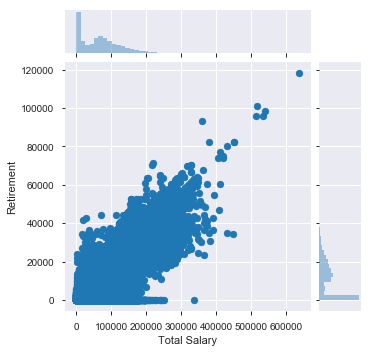

In [65]:
sns.jointplot(x="Total Salary", y="Retirement", data=dfm, size=5)

Total Salary and Health and Dental benefits do not have a normal distribution albeit somewhat positive correlation.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


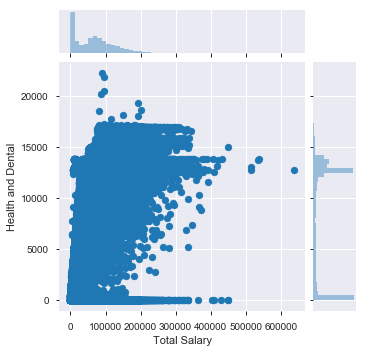

In [66]:
sns.jointplot(x="Total Salary", y="Health and Dental", data=dfm, size=5)

Total Salary and Other Benefits have a right skewed distribution suggesting as Total Salary increases, Other Benefits are not utilized as much.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


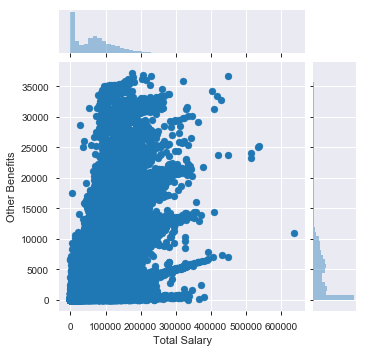

In [67]:
sns.jointplot(x="Total Salary", y="Other Benefits", data=dfm, size=5)

## NOTE: Since our focus is on Total Salary, it's up to you whether or not to include the below, which visualizes the Total Benefits side of the Total Compensation.

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


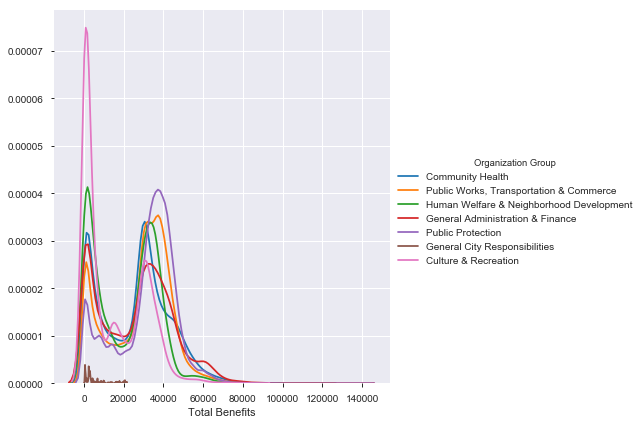

In [58]:
#Distribution of the Total Benefits by Organization Group 

sns.FacetGrid(df_clean, hue="Organization Group", size=6) \
.map(sns.kdeplot, "Total Benefits") \
.add_legend()

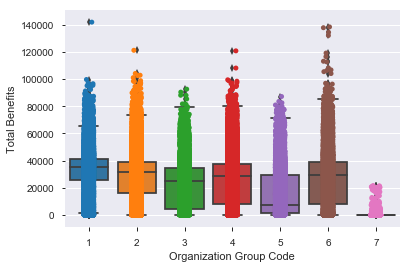

In [59]:
ax = sns.boxplot(x="Organization Group Code", y="Total Benefits", data=df_clean)
ax = sns.stripplot(x="Organization Group Code", y="Total Benefits", data=df_clean, jitter=True, edgecolor="gray")

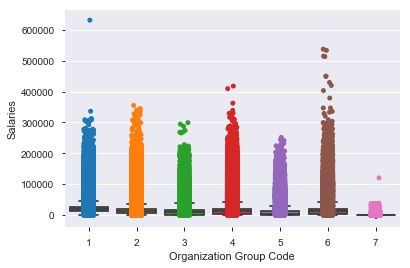

In [60]:
ax = sns.boxplot(x="Organization Group Code", y="Retirement", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Salaries", data=dfm, jitter=True, edgecolor="gray")

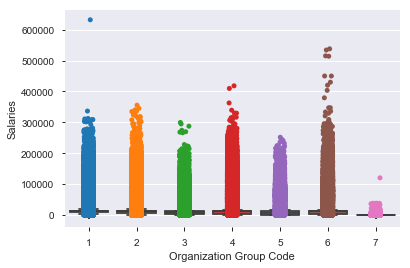

In [61]:
ax = sns.boxplot(x="Organization Group Code", y="Health and Dental", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Salaries", data=dfm, jitter=True, edgecolor="gray")

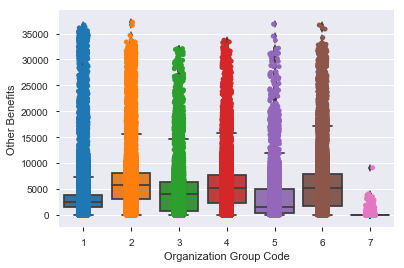

In [62]:
ax = sns.boxplot(x="Organization Group Code", y="Other Benefits", data=dfm)
ax = sns.stripplot(x="Organization Group Code", y="Other Benefits", data=dfm, jitter=True, edgecolor="gray")

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


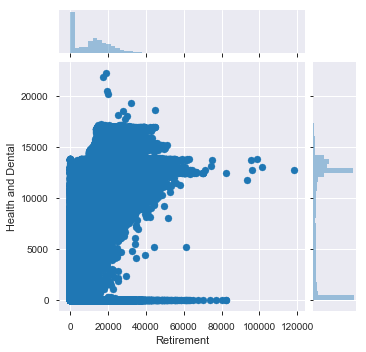

In [63]:
sns.jointplot(x="Retirement", y="Health and Dental", data=dfm, size=5)

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


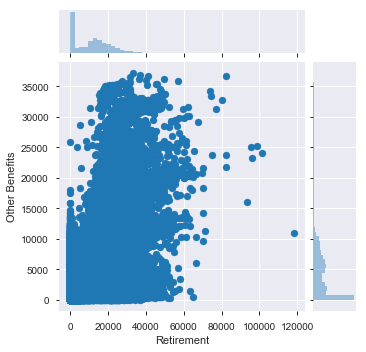

In [64]:
sns.jointplot(x="Retirement", y="Other Benefits", data=dfm, size=5)

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


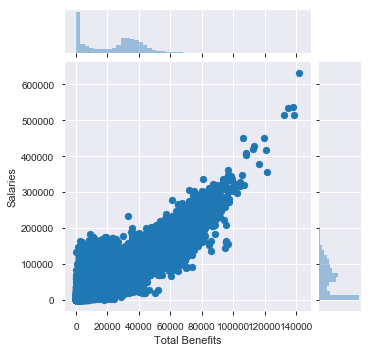

In [72]:
sns.jointplot(x="Total Benefits", y="Salaries", data=dfm, size=5)

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


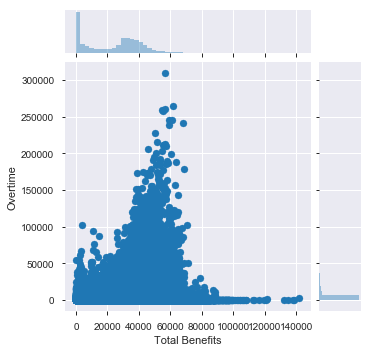

In [73]:
sns.jointplot(x="Total Benefits", y="Overtime", data=dfm, size=5)

C:\Users\mtran\AppData\Local\Continuum\anaconda3\envs\DS7331_Python3.5R\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


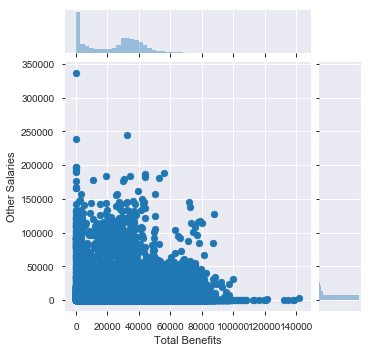

In [74]:
sns.jointplot(x="Total Benefits", y="Other Salaries", data=dfm, size=5)